In [3]:
import pandas as pd
import numpy as np


df = pd.read_csv('dfinal2.csv', delimiter = ';')

df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.000000,51.000000,8.0,322.0,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.190574,25.538934,8.3,138.0,E
2,2,Super Mario Bros.,GB,1999.0,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07,68.190574,25.538934,8.3,138.0,E
3,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.000000,73.000000,8.3,709.0,E
4,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.000000,73.000000,8.0,192.0,E


In [4]:
#Verification de la data shape
df.shape


(16730, 16)

In [5]:
#Verification doublons
print(df.duplicated().sum())

0


In [6]:
#Verification des types de colonnes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16730 entries, 0 to 16729
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    16730 non-null  int64  
 1   Name          16730 non-null  object 
 2   Platform      16730 non-null  object 
 3   Year          16730 non-null  float64
 4   Genre         16730 non-null  object 
 5   Publisher     16715 non-null  object 
 6   NA_Sales      16730 non-null  float64
 7   EU_Sales      16730 non-null  float64
 8   JP_Sales      16730 non-null  float64
 9   Other_Sales   16730 non-null  float64
 10  Global_Sales  16730 non-null  float64
 11  Critic_Score  16730 non-null  float64
 12  Critic_Count  16730 non-null  float64
 13  User_Score    16730 non-null  float64
 14  User_Count    16730 non-null  float64
 15  Rating        10688 non-null  object 
dtypes: float64(10), int64(1), object(5)
memory usage: 2.0+ MB


In [7]:
#Verification des NAN
df.isna().sum()


,0
Unnamed: 0,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,15
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


FR : Suite à l'appel de la methode isna(), nous remarquons que la dataset est quasiment propre, neanmoins nous observons quelque valeurs manquante dans la variable Publisher et Rating.
Nous allons verifier ça dans la suite du code

EN : Following the call to the isna() method, we notice that the dataset is almost clean; however, there are some missing values in the Publisher and Rating variables. We will further investigate this in the next part of the code

In [8]:
# Verification du types des colonnes
df.dtypes

,0
Unnamed: 0,int64
Name,object
Platform,object
Year,float64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64


In [9]:
#verification Variable Publisher
df['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Sony Computer Entertainment Europe', 'Bethesda Softworks',
       'Electronic Arts', 'Sega', 'SquareSoft', 'Namco Bandai Games',
       'Atari', '505 Games', 'Square Enix', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment', 'LucasArts', 'Virgin Interactive',
       'Warner Bros. Interactive Entertainment', 'Universal Interactive',
       'Eidos Interactive', 'RedOctane', 'Aspyr', 'Vivendi Games',
       'EA Tiburon', 'Enix Corporation', 'Success', 'Namco', 'Palcom',
       'Unknown', 'Parker Bros.', 'Hasbro Interactive', 'Valve Software',
       'THQ', 'Fox Interactive', 'Acclaim Entertainment', 'MTV Games',
       'Disney Interactive Studios', 'EA Sports', 'Coleco',
       'Majesco Entertainment', 'Codemasters', 'Arena Entertainment',
       'Red Orb', 'Psygnosis', 'Midway Games', 'Sunsoft', 'Level 5',
       'Rebellion', 'Taito', 

## split hold-out / Gestion de valeur manquante


In [11]:
# Suppression des colonnes superflu
df.drop([ "Rating","Unnamed: 0"], axis=1, inplace=True)

FR : Le dataset etait quasiment deja prêt à l'emploi car nous avons au préalable supprimé pas mal de colonne comme la colonne (Developper, Index) ... l'idée etait de faire pas beaucoup de preparation de donnée pour le machine learning car tout a etait fait en amont!

EN : The dataset was almost ready for use, as we had removed several columns beforehand, including Developer and Index. The goal was to limit the amount of data preparation required for machine learning, as most of the preprocessing had already been completed.

In [10]:
#Verification du dataset
df.tail()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
16725,16725,Transport Fever,"('PC',)",2016.0,Simulation,Astragon,0.00,0.03,0.00,0.00,0.04,70.0,11.0,7.0,28.0,NaN
16726,16726,Until Dawn: Rush of Blood,"('PS4',)",2016.0,Adventure,Sony Computer Entertainment,0.18,0.15,0.00,0.07,0.39,72.0,49.0,8.0,68.0,M
16727,16727,Watch Dogs 2,"('PS4',)",2016.0,Action,Ubisoft,0.37,0.58,0.00,0.18,1.13,83.0,88.0,7.8,621.0,M
16728,16728,World of Final Fantasy,"('PS4',)",2016.0,Role-Playing,Square Enix,0.08,0.14,0.08,0.04,0.33,77.0,74.0,8.3,222.0,E10+
16729,16729,WWE 2K17,"('PS4',)",2016.0,Sports,Take-Two Interactive,0.17,0.34,0.00,0.09,0.60,69.0,50.0,6.9,88.0,T


FR : Nous observons aucune valeurs manquante dans la variable cibles qui est la variable Year. De ce fait pas besoin de gerer les NAN dans cette variable .

EN : We observed no missing values in the target variable, Year. Therefore, there is no need to handle any NaN values for this variable.

In [12]:
# Separation de données : Split Hold out
from sklearn.model_selection import train_test_split

target = df.drop('Global_Sales', axis = 1)
features = df['Global_Sales']

X_train,X_test, y_train,y_test = train_test_split(target,features, test_size = 0.3 , random_state = 42)

print("la taille de donnée d'entrainement est :",X_train.shape)
print("la taille de donnée test est :",X_test.shape)

la taille de donnée d'entrainement est : (11711, 13)
la taille de donnée test est : (5019, 13)


In [13]:
# Gestion des Valeur manquante NAN
categorical_columns = ['Publisher']

for col in categorical_columns:
    X_train[col] = X_train[col].fillna(X_train[col].mode()[0])
    X_test[col] = X_test[col].fillna(X_train[col].mode()[0])

In [14]:
# Verification des NAN
X_train.isna().sum()

,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Critic_Score,0


FR : Nous avons donc aucune valeur manquante dans le dataset, ni dans les variables features ni dans la variable target,
la suite sera de trouver la bonne methode de features engineering parce que nous avons enormement de colonnes et pas mal de variable categorielle avec des valeurs.

EN : We have no missing values in the dataset, neither in the feature variables nor in the target variable. The next step will be to identify the appropriate feature engineering methods, as we have a large number of columns and several categorical variables with multiple values

## Vizualisation for Linear Regression



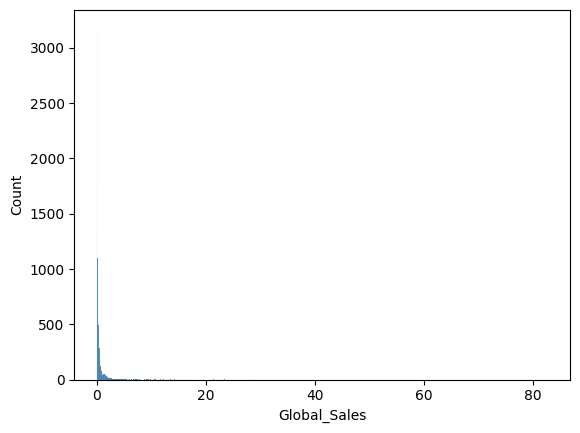

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
# Affichage de la repartition de la variable group

sns.histplot(df['Global_Sales'])
plt.show;

<ipython-input-16-1b466b5a9b34>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  data_viz.set_xticklabels(data_viz.get_xticklabels(), rotation=45, horizontalalignment='right')


[Text(0, 0, 'Year'),
 Text(1, 0, 'NA_Sales'),
 Text(2, 0, 'EU_Sales'),
 Text(3, 0, 'JP_Sales'),
 Text(4, 0, 'Other_Sales'),
 Text(5, 0, 'Global_Sales'),
 Text(6, 0, 'Critic_Score'),
 Text(7, 0, 'Critic_Count'),
 Text(8, 0, 'User_Score'),
 Text(9, 0, 'User_Count')]

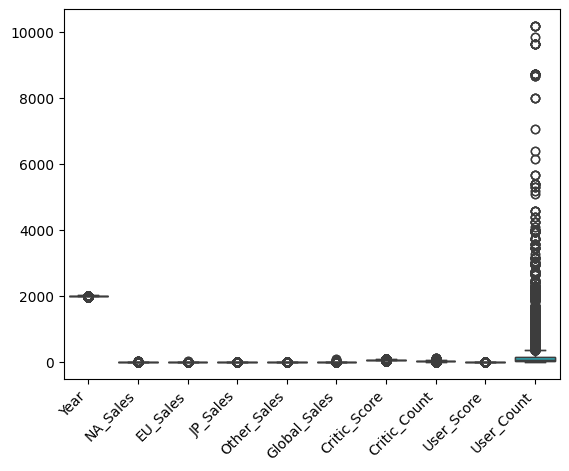

In [16]:
# Affichage boxplot pour les valeurs aberante et extreme
sns.boxplot(data =df);
data_viz = sns.boxplot(data = df)
data_viz.set_xticklabels(data_viz.get_xticklabels(), rotation=45, horizontalalignment='right')

FR : Nous observons que la majorité de notre donnée est concentré vers les années 1990 et son inférieur 2020. Nous pouvons egalement remarquer des valeurs extreme voir aberrante qui semble s'eloigner de notre point de concentrer du dataset. Nous on peut en deduire que ces valeurs sont anormale et qu'il faudrat les etudiers dans la prochaine étape du modèle.

EN : We observe that the majority of our data is concentrated around the 1990s and below 2020. We can also notice extreme or even outlier values that appear to deviate from the core focus of the dataset. Based on this, we can conclude that these values are abnormal and will need to be analyzed in the next stage of the model.

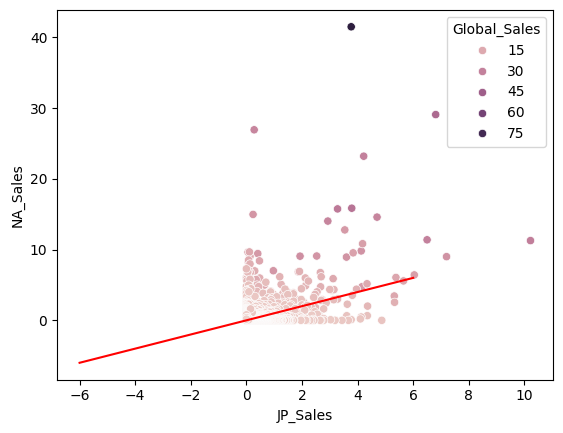

In [18]:
# Affichage nuage de point avec une droite linéaire

sns.scatterplot( x= 'JP_Sales', y= 'NA_Sales' , hue = 'Global_Sales' , data = df)
plt.plot([-6, 6], [-6, 6], color = 'red');

## Encoding

In [19]:
!pip install category_encoders
import category_encoders as ce


# Création de l'objet HashingEncoder
encoder = ce.HashingEncoder(cols=['Name', 'Platform', 'Genre', 'Publisher'], n_components=4)

# La méthode 'fit_transform' pour effectuer l'encodage Hashing sur l'ensemble d'entraînement
X_train_hash = encoder.fit_transform(X_train)

# Appliquer la transformation sur l'ensemble de test
X_test_hash = encoder.transform(X_test)

# Les colonnes encodées ont déjà des noms basés sur les composantes de hachage, donc pas besoin de spécifier des noms
X_train_encoded = pd.DataFrame(X_train_hash, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_hash, index=X_test.index)

# Vérification des données transformées
print(X_train_encoded.head())
print(X_test_encoded.head())


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 1.8 MB/s eta 0:00:00
       col_0  col_1  col_2  col_3    Year  NA_Sales  EU_Sales  JP_Sales  \
15816      0      1      1      2  2016.0      0.00      0.00      0.02   
1458       0      3      1      0  1998.0      0.94      0.07      1.05   
11942      0      1      1      2  2004.0      0.07      0.02      0.00   
10810      0      3      1      0  2004.0      0.07      0.05      0.00   
10843      0      2      1      1  2000.0      0.07      0.05      0.00   

       Other_Sales  Critic_Score  Critic_Count  User_Score  User_Count  
15816         0.00     72.992157     35.711111    7.653837  385.848414  
1458          0.04     81.000000     17.000000    8.900000   89.000000  
11942         0.00     70.758799     40.787785    7.166465  386.557884  
10810         0.02     48.000000     20.000000    6.700000   13.000000  
10843         0.01     73.283019     25.043019    7.132806   71.453333  
       col_0  col_1  col_2  col_3

In [20]:
# Vérification de la taille des données transformées
print(X_train_encoded.shape)
print(X_test_encoded.shape)

(11711, 13)
(5019, 13)


FR : La methode d'encodage la plus adapté est le hashing encoder grace à son efficacité en terme de memoire, de reduction de dimensionnalité et également adapté au modèle de dataset avec des variables à grande valeur unique.

EN :The most appropriate encoding method is the hashing encoder due to its efficiency in terms of memory usage, dimensionality reduction, and its adaptability to datasets with high cardinality categorical variables.

## Feature engineering


Dans ce contexte là, l'objectif etait de capturer les caracteristique les plus pertinentes pour predire la variable cible continue. Après avoir encodé les variables categorielles avec le " Hashing Encoder ", la prochaine étape etait de standardiser les caracteristiques pour les mettres à la meme échelle, puis la selection des caracteristiques avec SelectKbest et le f_regressor pour conserver les variables les plus pertinentes, en reduisant le surajustement et ameliorer le modèle.

EN : In this case, the goal was to capture the most relevant features to predict the continuous target variable. After encoding the categorical variables using the hashing encoder, the next step was to standardize the features to bring them to the same scale. Following that, we used SelectKBest with the f_regressor to keep the most relevant variables, reducing overfitting and enhancing the model's performance.


In [21]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler


# Standardisation des caractéristiques encodées
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Sélection des meilleures caractéristiques pour la régression linéaire

k = 4  #  ajustement de nombre
selector = SelectKBest(f_regression, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)

# Afficher le nombre de caractéristiques avant et après la sélection
print("Nombre de caractéristiques d'origine :", X_train_encoded.shape[1])
print("Nombre de caractéristiques réduites :", X_train_selected.shape[1])

# Appliquer la même transformation sur l'ensemble de test
X_test_selected = selector.transform(X_test_scaled)

# Afficher les colonnes sélectionnées
selected_columns = X_train_encoded.columns[selector.get_support()]
print("Caractéristiques sélectionnées :", selected_columns)

Nombre de caractéristiques d'origine : 13
Nombre de caractéristiques réduites : 4
Caractéristiques sélectionnées : Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], dtype='object')


FR : Les caracteristiques selectionnée sont 'JP_Sales', 'Critic_Count' et 'col_0'. En raison de la nature de l'algorithme de hachage qui ne conserve pas d'informations sur les catégories d'origine. Cela peut rendre l'interprétation des données difficile, elle ne correspond pas à une seule caractéristique originale. Au contraire, chaque colonne est une combinaison compressée des différentes caractéristiques catégorielles.

EN : The selected features are JP_Sales, Critic_Count, and col_0. Due to the nature of the hashing algorithm, which does not retain information about the original categories, this can make data interpretation challenging, as it does not correspond to a single original feature. Instead, each column represents a compressed combination of the various categorical features.FR

## Model : Linear Regression

In [22]:
# Test 1er modèle de : Regression Linéaire

from sklearn.linear_model import LinearRegression

# Instanciation du 1er model
model1 = LinearRegression()
model1.fit(X_train_selected, y_train)

#Estimation du coef estimé attribut intercept_
print(model1.intercept_)

#Estimation du coef estimé attribut ceof_
print(model1.coef_[0])

0.5272034839040218
0.7743523514218705


In [23]:
#Calcul de prediction
prediction = model1.predict(X_test_selected)

#Caclul des erreurs

erreurs = prediction - y_test

print(erreurs)

12773    0.000313
9152     0.000304
6698     0.000276
16538    0.000315
3280     0.000205
           ...   
10170    0.000310
1897     0.000195
14981    0.000311
8537     0.000308
16591    0.000317
Name: Global_Sales, Length: 5019, dtype: float64


## Interpreting Linear Regression model

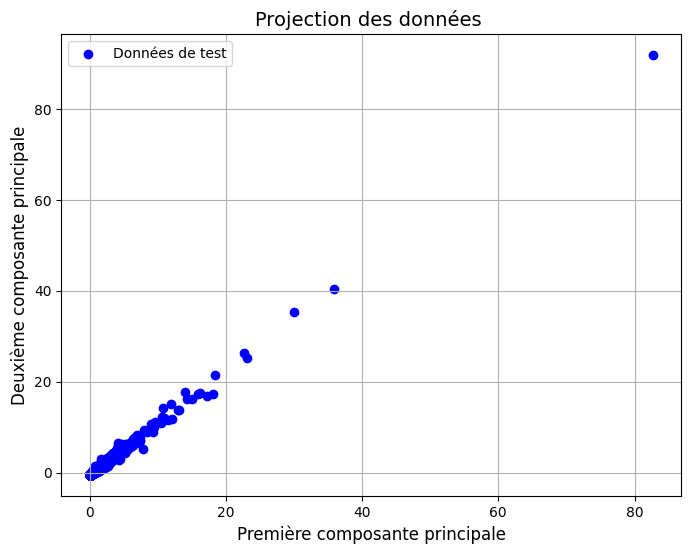

In [24]:
# Application de la PCA
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

# Réduction à 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_selected)
X_test_pca = pca.transform(X_test_selected)

# Création d'un modèle
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

# Prédiction sur l'ensemble de test réduit
y_pred_pca = model_pca.predict(X_test_pca)

# Visualisation des données avec vecteurs directeurs de la PCA et droite de régression
plt.figure(figsize=(8,6))
plt.grid()

# Tracé des points projetés
plt.scatter(y_test,X_test_pca[:, 0], color='blue', label='Données de test')


# Ajout de labels, titre et légende
plt.title("Projection des données ", fontsize=14)
plt.xlabel("Première composante principale", fontsize=12)
plt.ylabel("Deuxième composante principale", fontsize=12)
plt.legend()
plt.show()

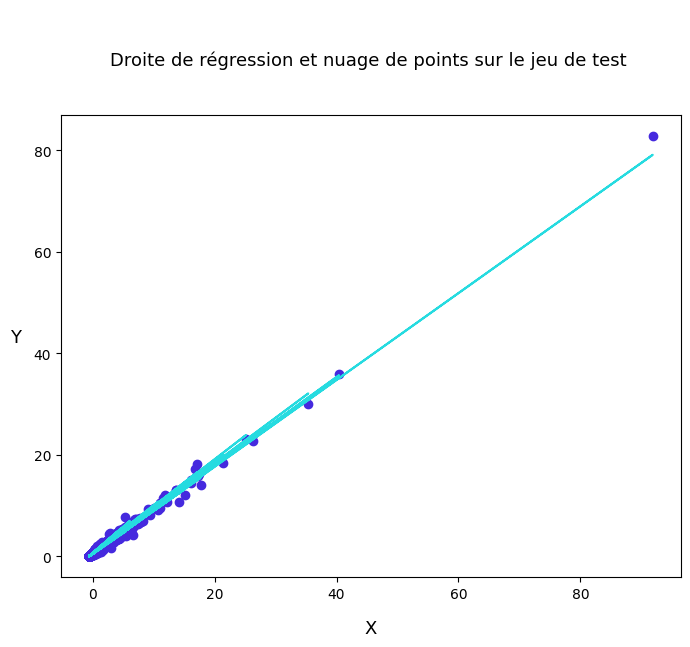

In [25]:
plt.figure(figsize=(8, 6))

plt.scatter(X_test_pca[:, 0], y_test, color='#4529de')

plt.plot(X_test_pca[:, 0], y_pred_pca ,color='#26dbe0')

plt.title("\n\nDroite de régression et nuage de points sur le jeu de test \n\n", fontsize=13)

plt.xlabel("X",labelpad=13, fontsize=13)

plt.ylabel("Y", rotation=0, labelpad=13, fontsize=13)

plt.show()

## Regression Metrics

In [26]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Évaluation du modèle
mse_lr = mean_squared_error(y_test, prediction)
r2_lr = r2_score(y_test, prediction)
mae_lr = mean_absolute_error(y_test, prediction)

print(f"MSE (Linear Regression): {mse_lr}")
print(f"R^2 (Linear Regression): {r2_lr}")
print(f"MAE (Linear Regression): {mae_lr}")

MSE (Linear Regression): 2.738291667956214e-05
R^2 (Linear Regression): 0.9999919205801796
MAE (Linear Regression): 0.002939962607412098


## Model : Tree Decision Regressor

In [27]:
from sklearn.tree import DecisionTreeRegressor

# Instanciation du modèle
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_selected, y_train)

y_pred_dt = dt_model.predict(X_test_selected)

# Évaluation du modèle
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

print(f"MSE (Decision Tree): {mse_dt}")
print(f"R^2 (Decision Tree): {r2_dt}")
print(f"MAE (Decision Tree): {mae_dt}")

MSE (Decision Tree): 0.5497696110975281
R^2 (Decision Tree): 0.8377886642047343
MAE (Decision Tree): 0.05039400571760888


In [28]:
#Analyse du score du jeux d'entrainement


from sklearn.tree import DecisionTreeRegressor

model_min_samples = DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 25, random_state=42)
model_min_samples.fit(X_train_selected, y_train)


print('Score sur ensemble train', model_min_samples.score(X_train_selected, y_train))

print('Score sur ensemble test', model_min_samples.score(X_test_selected, y_test))

Score sur ensemble train 0.7619919979493422
Score sur ensemble test 0.6055885445548996


## Optimisation d'Hyperparametre : GRID SEARCH

In [30]:
from sklearn.model_selection import GridSearchCV

# Grid search pour l'arbre de décision de régression
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_selected, y_train)

print("Best hyperparameter:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Best hyperparameter: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.09261770604282824


In [31]:
#Analyse du score du jeux d'entrainement

from sklearn.tree import DecisionTreeRegressor

model_min_samples = DecisionTreeRegressor(max_depth = 10, min_samples_leaf = 4, random_state=42)
model_min_samples.fit(X_train_selected, y_train)


print('Score train set', model_min_samples.score(X_train_selected, y_train))

print('Score test set', model_min_samples.score(X_test_selected, y_test))

Score train set 0.9824497095147197
Score test set 0.8375915202822308


## Interpretation modèle de l'arbre de décision
